In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(456)
tf.set_random_seed(456)
%matplotlib inline

In [2]:
N = 100
w_true = 5
b_true = 2
noise_scale = .1
# x_np = np.random.rand(N, 1).astype(dtype=np.float32)
x_np = np.random.rand(N, 1)
noise = np.random.normal(scale=noise_scale, size=(N, 1))
y_np = np.reshape(w_true * x_np + b_true + noise, (-1))

In [3]:
with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (N, 1))
    y = tf.placeholder(tf.float32, (N))

with tf.name_scope("weights"):
    W = tf.Variable(tf.random_normal((1,1)), name="w")
    b = tf.Variable(tf.random_normal((1,)), name="b")
    
with tf.name_scope("prediction"):
    y_pred = tf.matmul(x, W) + b

with tf.name_scope("loss"):
    l = tf.reduce_sum((y-tf.squeeze(y_pred))**2)

with tf.name_scope("optim"):
    train_op = tf.train.AdamOptimizer(.001).minimize(l)

with tf.name_scope("summaries"):
    tf.summary.scalar("loss", l)
    merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter('/tmp/lr-train', tf.get_default_graph())

In [4]:
n_steps = 10000

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(n_steps):
        feed_dict = {x: x_np, y: y_np}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        if i % 1000 == 0:
            print("step %d, loss: %f" % (i, loss))
        train_writer.add_summary(summary, i)
    
    W_final, b_final = sess.run([W, b])
    print("w_true: 5 W: %f" % W_final)
    print("b_true: 2 b: %f" % b_final)

step 0, loss: 2621.653564
step 1000, loss: 1378.520386
step 2000, loss: 630.408203
step 3000, loss: 232.164062
step 4000, loss: 65.039459
step 5000, loss: 19.653280
step 6000, loss: 12.029984
step 7000, loss: 8.460009
step 8000, loss: 5.058216
step 9000, loss: 2.579878
w_true: 5 W: 4.765114
b_true: 2 b: 2.123778


In [7]:
x_zeros = np.random.multivariate_normal(mean=np.array((-1,-1)), cov=.1*np.eye(2), size=(N//2,))
y_zeros = np.zeros((N//2,))

x_ones = np.random.multivariate_normal(mean=np.array((1,1)), cov=.1*np.eye(2), size=(N//2,))
y_ones = np.ones((N//2,))

x_l = np.vstack([x_zeros, x_ones])
y_l = np.concatenate([y_zeros, y_ones])

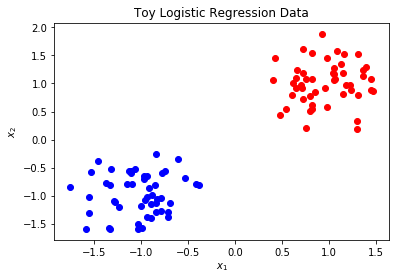

In [4]:
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Toy Logistic Regression Data")

plt.scatter(x_zeros[:, 0], x_zeros[:, 1], color="blue")
plt.scatter(x_ones[:, 0], x_ones[:, 1], color="red")
plt.show()

In [5]:
with tf.name_scope("placeholders"):
    x = tf.placeholder(tf.float32, (N, 2))
    y = tf.placeholder(tf.float32, (N,))
    
with tf.name_scope("weights"):
    W = tf.Variable(tf.random_normal((2,1)))
    b = tf.Variable(tf.random_normal((1,)))

with tf.name_scope("prediction"):
    y_logit = tf.squeeze(tf.matmul(x, W) + b)
    y_one_prob = tf.sigmoid(y_logit)
    y_pred = tf.round(y_one_prob)

with tf.name_scope("loss"):
    entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
    l = tf.reduce_sum(entropy)

with tf.name_scope("optim"):
    train_op = tf.train.AdamOptimizer(0.01).minimize(l)

with tf.name_scope("summaries"):
    tf.summary.scalar("loss_logit", l)
    merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter("/tmp/logistic-train", tf.get_default_graph())

In [9]:
n_steps = 1000

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(n_steps):
        feed_dict = {x: x_l, y: y_l}
        _, summary, loss = sess.run([train_op, merged, l], feed_dict=feed_dict)
        if i % 100 == 0:
            print("loss: %f" % loss)
        train_writer.add_summary(summary)

loss: 32.260105
loss: 8.211011
loss: 4.180475
loss: 2.656193
loss: 1.884815
loss: 1.428922
loss: 1.131943
loss: 0.925124
loss: 0.773913
loss: 0.659188
